Following automation was written for calculating possible ions capable of penetrating targets and corresponding damage cross-section for each ion and energy. It was written for an imminent experiment at RBI and is used as an example to demonstrate applications of pysrim (and jupyter notebook) combined with octave scripts. 

EXTRACT SRIM DATA AND FIND APPROPRIATE ENERGY FOR EACH ION (gnu octave)

Assuming SRIM 2013, pysprim and octave are installed and working propperly. 
It is considered that the user has run SRIM in order to calculate ion range in a target and all files named "$element in $target.txt" as a result of that calculation are storred in the same folder, along with "AtomicNumb.txt" file. In this example files are "$element in Iron.txt". Following scripts extract Srim data and plot minimum required energy (according to them) in order to pass a target of "x" depth (here x=4um)

Step1: Run "convert_txt"
Output: IonRanges_*um.pdf, data_all_4um.dat

m1 = -29.218
m1 = -26.524
m1 = -29.527
m1 = -26.352
m1 = -29.526
m1 = -26.349
m1 = -29.238
m1 = -26.540
m1 = -29.532
m1 = -26.721
m1 = -29.688
m1 = -26.330
m1 = -29.956
m1 = -26.924
m1 = -29.482
m1 = -26.881
m1 = -29.786
m1 = -26.276
m1 = -29.103
m1 = -26.935
m1 = -29.294
m1 = -26.732
m1 = -29.075
m1 = -26.240
m1 = -29.639
m1 = -26.078
m1 = -29.573
m1 = -26.204


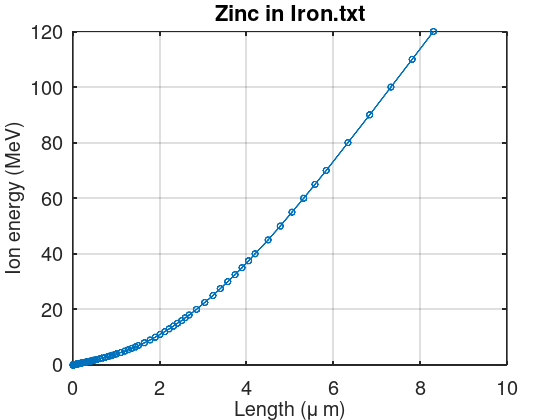

In [1]:
clear
clf
%%% Plots Srim results of ion length in iron sample
%Energy is in the first row and length in the 4th
C = load("AtomicNumb.txt");
files = glob('*Iron.txt');

for i = 1:numel(files)
for n = 1:107,
  data1(n,i) = C(i);
  end
end


for n=1:numel(files)
b = files{n};  
A = dlmread(b);

% convert keV to MeV for first row
i = find(A(:,1)==10);
i(1) = min(i);
k = find(A(:,1)==120);
kk = find(A(:,1)==900);
i(2) = max(k);
for nn = i(1):kk,
A(nn,1)= A(nn,1)/1000;
end

for m = i(1):i(2),
%  if A(m,1)>30,
%A(m,1)=A(m,1)/1000;
%endif
B(m-i(1)+1,:) = A(m,:);
end


% convert A to um
j = find(B(:,5)> 9000);
k = max(j);
for m = 1:k,
  B(m,5) = B(m,5)/10000;
end 

% in cases of He and H ranges reach mm width, so another loop is required in case of 
% ranges larger than um

l = find(B(:,5) > 800);
g = max(l);
for m = g+1:length(B(:,5)),
  B(m,5) = B(m,5)*1000;
end 
 


%files{m} = {['RvsT_' num2str(m) '.dat']};
E = B(:,1);
R = B(:,5);

%% make data matrix
if n == 1,
  data = [data1(:,1) E R];
else
  data = [data data1(:,n) E R];
endif


%figure 1
m1 = plot(R,E,'-o')
set (m1,'linewidth',2)
h=get(gcf, "currentaxes");
set(h, "fontsize", 20, "linewidth", 2);
grid 

xlabel('Length (\mu m)','fontsize', 20)
ylabel('Ion energy (MeV)','fontsize', 20)
title(b)
print -dpdf -fillpage -portrait -append IonRanges

end

save ("-ascii", "data_all_4um.dat" ,"data");

Step 2: Run "find_depthLarger*.m" (octave)

Output: "data_all_for4um.dat", "energy_ranges.dat", "Min_charge_vs_ions.png", 
        "Min_energy_vs_ions.png"

 added to session magics.

ans = 0
m2 = -330.01


Inline plot failed, consider trying another graphics toolkit
error: matrix cannot be indexed with {
error: called from
    _make_figures>safe_print at line 125 column 7
    _make_figures at line 49 column 13



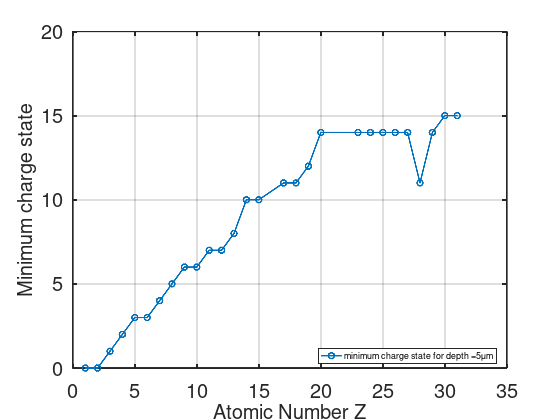

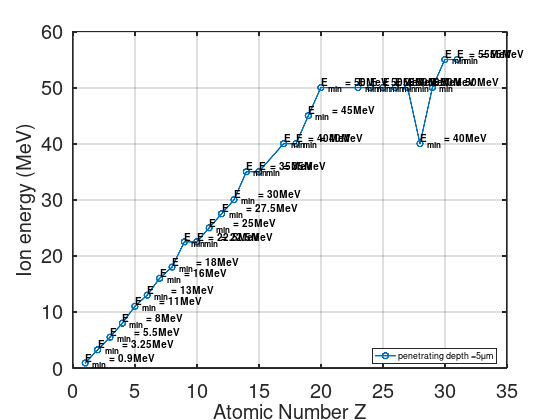

In [6]:
%%% plot different parameters
clear 
clf

A = load("data_all_4um.dat");
m = 0;
%% set requested penetrating depths n
for n=5
  k=0;
  
  m++
  clear C
  
 for i = 3:3:columns(A),
  j = find((A(:,i)>(n-0.001)) & (A(:,i)<(n+0.5)));
  TF = isempty(j);
  if TF == 0,
   k++;
   j = min(j);
   %m = k+length(j)
  else,
   k++
   j = find((A(:,i)>(n-0.01)) & (A(:,i)<(n+1)));
   j = min(j);
 %% B is a table with B1=atomic number B2 = Minimum energy B3 = penetrating depth from srim  
  end
 C(k,:) = A(j,i-2:i);
   B = sortrows(C); 
end

char_stat = B(:,2)/3.5-1; % calculate min charge state
for l = 1:length(char_stat),
if mod(char_stat(l)*10,10)<5,
char_stat1(l) = round(char_stat(l))+1; % round min charge state to next integer
else,
char_stat1(l) = round(char_stat(l)); % round min charge state to nearest integer
end
end
Emed = (char_stat1+1)*3.5 ;% calculate energy with min charge and 3.5MV
Emax = (B(:,1)+1)*3.5; %calculate max energy with full stripping

figure 3
m1 = plot(B(:,1),B(:,2), '-o');
 set (m1,'linewidth',2)
 
legendInfo{m}=['penetrating depth =',num2str(n), '\mum']; 
legend(legendInfo,'location','southeast')
for j = 1:rows(B(:,2)),
s{j} = [ 'E_{min} = ' num2str(B(j,2)) 'MeV'];
text(B(j,1),B(j,2)+0.5,s{j},'fontsize', 10,'fontweight','bold')
end

hold on  
end
hold off

%legend('10um', '5um')
h=get(gcf, "currentaxes");
set(h, "fontsize", 20, "linewidth", 2);
grid 


xlabel('Atomic Number Z','fontsize', 20)
ylabel('Ion energy (MeV)','fontsize', 20)
print -dpng Min_energy_vs_ions
min_charge = [B(:,1) char_stat];

figure 2
m2 = plot( B(:,1), char_stat1, '-o')
set (m2,'linewidth',2)
legendInfo{m}=['minimum charge state for depth =',num2str(n), '\mum']; 
legend(legendInfo,'location','southeast')  
h=get(gcf, "currentaxes");
set(h, "fontsize", 20, "linewidth", 2);
grid 


xlabel('Atomic Number Z','fontsize', 20)
ylabel('Minimum charge state','fontsize', 20)
print -dpng Min_charge_vs_ions
%gother data with columns:
%1: atomic number 2:penetrating depth 5um 3: min energy 4: Emedium 5: E max 6: min charge state
gen_info = [B(:,1) B(:,3) B(:,2) Emed' Emax char_stat1' ];
save ("-ascii", "data_all_for4um.dat" ,"gen_info");

ener_range = [B(:,1) B(:,2) Emax];
save("-ascii", "energy_ranges.dat", "ener_range")